Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import pickle

In [4]:
sales = pd.read_csv("sales.csv")
sales.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [6]:
sales.isna().sum()

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

Clean some entries

In [7]:
sales['state_holiday'] = sales['state_holiday'].replace({'a': '1', 'b': '1', 'c': '1'})
sales['state_holiday'] = sales['state_holiday'].astype(int)

In [8]:
sales = sales.set_index('Unnamed: 0')

Date format

In [9]:
sales['date'] = pd.to_datetime(sales['date'], format='%Y-%m-%d')

Add quarters

In [10]:
sales['quarter'] = sales['date'].dt.quarter

Fix false entries

In [11]:
sales.loc[sales['sales'] == 0, 'open'] = 0

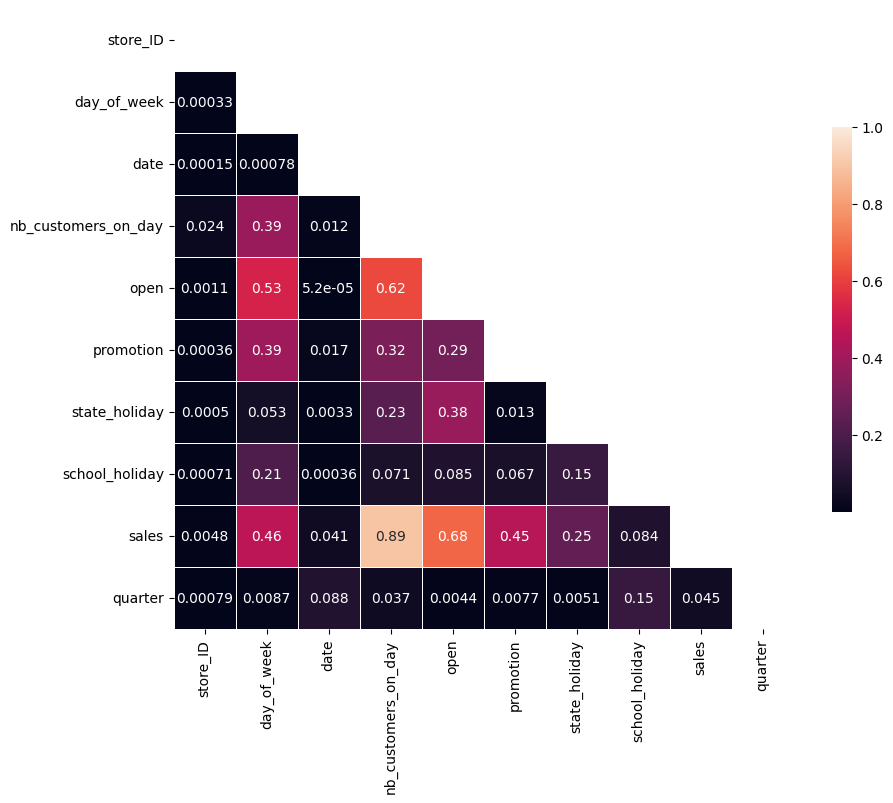

In [12]:
corr=np.abs(sales.corr())
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

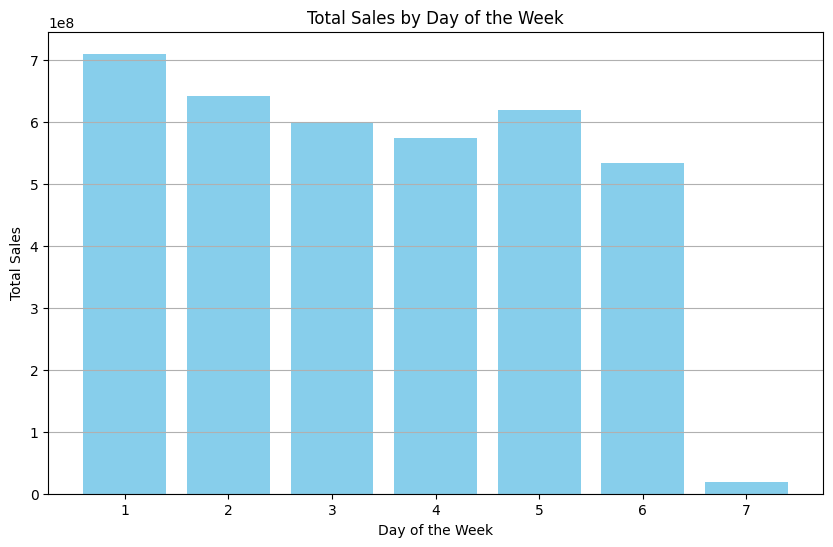

In [13]:
sales_over_time = sales.groupby('day_of_week')['sales'].sum()
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_over_time.index, sales_over_time.values, color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(sales_over_time.index)  # Ensure day_of_week labels are shown
plt.grid(True, axis='y')
plt.show()

TRAINING SPLIT

In [14]:
X_train, X_test,y_train, y_test = train_test_split(sales.drop(
    columns = ['sales', 'date']), sales['sales'],test_size=0.1, random_state = 1)

In [15]:
print(X_train.shape)
X_train.head(3)

(576756, 8)


,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,quarter
Unnamed: 0,,,,,,,,
126314,673,3,520,1,1,0,0,2
307163,687,6,717,1,0,0,0,2
216072,1034,4,745,1,0,0,0,2


In [16]:
print(X_test.shape)

(64084, 8)


KNN MODEL

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)
np.array(y_test)

[5181 7815    0 ... 7294    0 5558]


array([8415, 8976,    0, ..., 9211,    0, 6132])

In [18]:
print(accuracy_score(y_test,y_predict))
knn.score(X_test, y_test)

0.171275201298296


0.171275201298296

NORMALIZATION

In [19]:
normalizer = MinMaxScaler()
normalizer = normalizer.fit(X_train)

In [20]:
X_train_normalized = normalizer.transform(X_train)
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train.columns)
X_train_normalized.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,quarter
0,0.603232,0.333333,0.095273,1.0,1.0,0.0,0.0,0.333333
1,0.615799,0.833333,0.131367,1.0,0.0,0.0,0.0,0.333333
2,0.927289,0.500000,0.136497,1.0,0.0,0.0,0.0,0.333333
3,0.729803,0.833333,0.095090,1.0,0.0,0.0,0.0,0.333333
4,0.052962,0.833333,0.088311,1.0,0.0,0.0,0.0,0.333333


In [21]:
X_test_normalized = normalizer.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test.columns)
X_test_normalized.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,quarter
0,0.828546,0.166667,0.147856,1.0,0.0,0.0,1.0,1.000000
1,0.969479,0.166667,0.234701,1.0,1.0,0.0,0.0,0.333333
2,0.192101,0.500000,0.000000,0.0,1.0,1.0,1.0,0.333333
3,0.701975,0.833333,0.106632,1.0,0.0,0.0,0.0,0.666667
4,0.147217,0.166667,0.074753,1.0,0.0,0.0,0.0,1.000000


DECISSION TREE CLASSIFIER

In [22]:
# model = DecisionTreeClassifier(max_depth = 50)
# model.fit(X_train, y_train)
# print("test data accuracy was ",model.score(X_test,y_test))
# print("train data accuracy was ",model.score(X_train,y_train))

MemoryError: could not allocate 20729298944 bytes

BAGGING

In [23]:
from sklearn.ensemble import BaggingRegressor

bagging_reg = BaggingRegressor(
    DecisionTreeRegressor(max_depth=3), # depth 3 to force tree to be "weak"
    n_estimators=10, # 10 trees
    max_samples=100, # we limit each weaker tree to 100 datapoints
    random_state=1) # fixing random state because I want my examples to work and to look smart

bagging_reg.fit(X_train, y_train)
bagging_reg.score(X_test,y_test)

0.8393544125723171

RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, # same 10 trees
                               max_depth=3, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
forest.fit(X_train, y_train)
forest.score(X_test,y_test)

KeyboardInterrupt: 

ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), # you can overfit a bit because you compensate afterwards
                            n_estimators=10, # same 10 trees. You usually use faaaar more estimators
                            random_state=1 # once a coward, always a coward
                            )
ada_reg.fit(X_train, y_train)
ada_reg.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                            n_estimators=50, # that's more like it
                            random_state=1 # once a coward, always a coward
                            )
ada_reg.fit(X_train, y_train)
ada_reg.score(X_test,y_test)

GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=5, #gradient boosting always works with trees, no need to call the tree regressor
                                   n_estimators=50,
                                   random_state=1 # tastes like chicken
                                   )
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test,y_test)

EXTREME GRADIENT BOOSTING

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor(max_depth=5)
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test,y_test)

THE BEST MODEL

In [25]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)
print(tree.score(X_test,y_test))

0.9410071436244263


CHECK FOR OVERFITTING

In [26]:
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
  model = DecisionTreeRegressor(max_depth= depth)
  model.fit(X_train, y_train)
  test.append(model.score(X_test,y_test))
  train.append(model.score(X_train,y_train))

KeyboardInterrupt: 

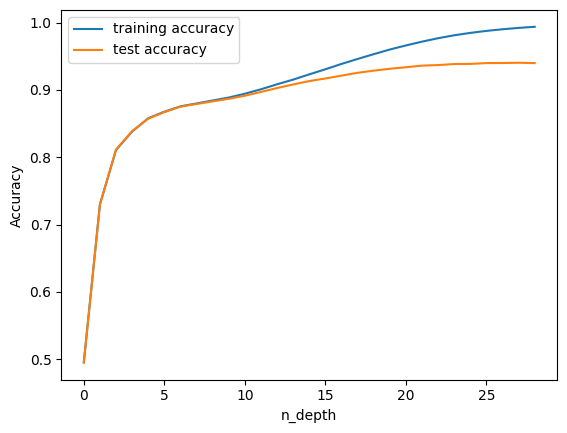

In [ ]:

plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

DATA PREP FUNCTION

In [27]:
def data_prep(df):
  
    #df = df.set_index('Unnamed: 0')

    df["state_holiday"] = df["state_holiday"].replace({'0' : '0','a':'1','b':'1','c':'1', })
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    #df['date'] = pd.to_datetime(df['date'])
    df['quarter'] = df['date'].dt.quarter
    df.loc[sales['sales'] == 0, 'open'] = 0
    display (df)
    

PICKLE

In [ ]:
pickle.dump(tree, open('deep_mind_model.pkl', 'wb'))
X_test.to_pickle('x_test.p')
y_test.to_pickle('y_test.p')
tree_model = pickle.load(open('deep_mind_model.pkl', 'rb'))
x_test_saved = pd.read_pickle('x_test.p')
y_test_saved = pd.read_pickle('y_test.p')
# first create the predictions:
y_pred_saved = tree.predict(x_test_saved)


r2_score(y_test_saved,y_pred_saved)

0.9410071436244263

In [ ]:
y_pred = tree.predict(X_test)
r2= r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = np.sqrt(((y_test-y_pred)**2).mean())
print(r2,mae, mse )

0.9410071436244263 512.4629392672118 939.8269943982052


MAE : On average, our model’s predictions are off by $512.46 
We can expect an error of about $512.46.

MSE : Our model’s average squared error is 939.82. 
This metric is more sensitive to outliers compared to MAE because it squares the errors, thus amplifying larger errors. 

R² score : approximately 94% of the variance in sales is explained by our model. 
This is a strong indication that our model is performing well because an R² score close to 1 suggests that the model is a good fit for the data.

Sample_validation:

In [30]:
validation= pd.read_csv('validation_for students.csv').set_index('index')
validation.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
index,,,,,,,,
272371,415,7,01/03/2015,0,0,0,0,0
558468,27,7,29/12/2013,0,0,0,0,0
76950,404,3,19/03/2014,657,1,1,0,0
77556,683,2,29/01/2013,862,1,0,0,0
456344,920,3,19/03/2014,591,1,1,0,0


In [32]:
validation["state_holiday"] = validation["state_holiday"].replace({'0' : '0','a':'1','b':'1','c':'1', })
validation['date'] = pd.to_datetime(validation['date'], format='%d/%m/%Y')
validation['quarter'] = validation['date'].dt.quarter


In [35]:
validation.drop('date', axis = 1, inplace = True)
validation.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,quarter
index,,,,,,,,
272371,415,7,0,0,0,0,0,1
558468,27,7,0,0,0,0,0,4
76950,404,3,657,1,1,0,0,1
77556,683,2,862,1,0,0,0,1
456344,920,3,591,1,1,0,0,1


In [42]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71205 entries, 272371 to 85695
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   store_ID             71205 non-null  int64 
 1   day_of_week          71205 non-null  int64 
 2   nb_customers_on_day  71205 non-null  int64 
 3   open                 71205 non-null  int64 
 4   promotion            71205 non-null  int64 
 5   state_holiday        71205 non-null  object
 6   school_holiday       71205 non-null  int64 
 7   quarter              71205 non-null  int32 
dtypes: int32(1), int64(6), object(1)
memory usage: 4.6+ MB


In [34]:
X_train.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,quarter
Unnamed: 0,,,,,,,,
126314,673,3,520,1,1,0,0,2
307163,687,6,717,1,0,0,0,2
216072,1034,4,745,1,0,0,0,2
624401,814,6,519,1,0,0,0,2
345468,60,6,482,1,0,0,0,2


Validation:

In [55]:
y_pred_saved = tree.predict(validation)

len(y_pred_saved)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- predicted_sales
Feature names seen at fit time, yet now missing:
- day_of_week
- nb_customers_on_day
- open
- promotion
- quarter
- ...


In [44]:
output_df = pd.DataFrame(y_pred_saved, columns=['Prediction_values'])
output_df

,Prediction_values
0,0.0
1,0.0
2,5986.0
3,8259.0
4,5359.0
...,...
71200,0.0
71201,0.0
71202,5794.0
71203,6350.0


In [46]:
validation['predicted_sales'] = y_pred_saved 
display(validation)

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,quarter,sales,predicted_sales
index,,,,,,,,,,
272371,415,7,0,0,0,0,0,1,0.0,0.0
558468,27,7,0,0,0,0,0,4,0.0,0.0
76950,404,3,657,1,1,0,0,1,5986.0,5986.0
77556,683,2,862,1,0,0,0,1,8259.0,8259.0
456344,920,3,591,1,1,0,0,1,5359.0,5359.0
...,...,...,...,...,...,...,...,...,...,...
59062,441,7,0,0,0,0,0,4,0.0,0.0
687449,377,7,0,0,0,0,0,3,0.0,0.0
207393,15,3,648,1,0,0,0,2,5794.0,5794.0


In [50]:
validation.columns

Index(['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'state_holiday', 'school_holiday', 'quarter', 'predicted_sales'],
      dtype='object')

In [51]:
validation.drop(['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'state_holiday', 'school_holiday', 'quarter'], axis = 1, inplace = True)

In [52]:
validation

,predicted_sales
index,
272371,0.0
558468,0.0
76950,5986.0
77556,8259.0
456344,5359.0
...,...
59062,0.0
687449,0.0
207393,5794.0


In [53]:
validation.to_csv('output.csv', index=False)